In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

### open one wind file per model

In [ ]:
ds_GERICS = xr.open_dataset("../data/GERICS/FOREST/raw_data/e062009t201512_wnd.nc", drop_variables=["FIB", "T", "V", "PS"]).squeeze()
ds_GERICS["FI"]

In [ ]:
ds_GERICS["FI"].isel({"rlon":60, "rlat":60}).mean(dim="time")

GERICS model uses `lev_2` as a vertical wind coordinate and provides time varying geopotential height `FI` for each model level and location

In [ ]:
ds_IDL = xr.open_dataset("../data/IDL/EVAL/ua/ua_EUR-44_ECMWF-ERAINT_LUCAS_EVAL_r1i1p1_IDL_WRFV381D_v1_1hr_2015010100-2015123123.nc")

In [ ]:
ds_IDL

In [ ]:
ds_IDL.mlev

In [ ]:
ds_IDL_zg = xr.open_dataset("../data/IDL/EVAL/zg/zg_EUR-44_ECMWF-ERAINT_LUCAS_EVAL_r1i1p1_IDL_WRFV381D_v1_1hr_2005010100-2005123123.nc")

In [ ]:
ds_IDL_zg.isel(rlat=50,rlon=50)["zg"].mean(dim="time")

IDL provides `mlev` as vertical coordinate. Geopotential height `zg` stored in a different file.

In [ ]:
ds_JLU = xr.open_dataset("../data/JLU/EVAL/U850p/U850p_2004010100-2004123118.nc")

In [ ]:
ds_JLU

JLU provides wind components at pressure levels 500hPa, 750hPa, 850hPa as well as at 10m. 

In [ ]:
ds_OUR = xr.open_dataset("../data/OUR/EVAL/ua/ua_EUR44_ECMWF-ERAINT_LUCAS_EVAL_OUR_CRCM5_CLASS_3hr_20150101-20151231.nc")

In [ ]:
ds_OUR

OUR provides wind components at pressure levels at 1000, 975, 950, 925, 900, 850 hPa

In [ ]:
# ETH data still missing

### Approximate vertical grid spacing in meters

#### GERICS

In [ ]:
ds_GERICS_FI = xr.open_dataset("../data/GERICS/GRASS/FI_interpolated/FI_2000.nc")
ds_GERICS_FIB = xr.open_dataset("../data/GERICS/GRASS/FIB/FIB_2000.nc")

In [ ]:
ds_GERICS_FI.mean(dim="time")

In [ ]:
ds_GERICS_FIB

In [ ]:
ds_GERICS_height = ds_GERICS_FI.mean(dim="time")["FI"] - ds_GERICS_FIB.mean(dim="time")["FIB"]

In [ ]:
ds_GERICS_height

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
f, axs = plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(12, 12))
for i, lev_2 in enumerate(range(19,28)):
    ds_tmp = ds_GERICS_height.sel({"lev": lev_2})
    ds_tmp.plot(ax=axs.flatten()[i])
    axs.flatten()[i].set(xlabel="", ylabel="")

looks like the same pattern but with scaled values

In [ ]:
f, axs = plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(12, 12))
for i, lev_2 in enumerate(range(19,28)):
    ds_tmp = ds_GERICS_height.sel({"lev_2": lev_2})
    ds_tmp /= ds_tmp.mean()
    ds_tmp.plot(ax=axs.flatten()[i], vmin=0.80, vmax=1.1)
    axs.flatten()[i].set(xlabel="", ylabel="")

#### IDL

In [ ]:
ds_IDL_zg = xr.open_dataset("../data/IDL/EVAL/zg/zg_EUR-44_ECMWF-ERAINT_LUCAS_EVAL_r1i1p1_IDL_WRFV381D_v1_1hr_2000010100-2000123123.nc")
ds_IDL_oro = xr.open_dataset("../data/IDL/orog_EUR-44_ECMWF-ERAINT_LUCAS_EVAL_r1i1p1_IDL_WRFV381D_v1_fx.nc")
# coordinates are off by a rounding error. Corrected here
for ds_tmp in [ds_IDL_zg, ds_IDL_oro]:
    for rdim in ["rlat", "rlon"]:
        ds_tmp[rdim] = np.round(ds_tmp[rdim], 2)

In [ ]:
ds_IDL_height = ds_IDL_zg["zg"] - ds_IDL_oro["orog"]

In [ ]:
f, axs = plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(12, 12))
for i, lev_2 in enumerate(range(9)):
    ds_tmp = ds_IDL_height.sel(mlev=lev_2).mean(dim="time")
    ds_tmp.plot(ax=axs.flatten()[i])
    axs.flatten()[i].set(xlabel="", ylabel="")

In [ ]:
# Again scaled
f, axs = plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(12, 12))
for i, lev_2 in enumerate(range(9)):
    ds_tmp = ds_IDL_height.sel({"mlev": lev_2})
    ds_tmp /= ds_tmp.mean()
    ds_tmp.plot(ax=axs.flatten()[i], vmin=0.9, vmax=1.1)
    axs.flatten()[i].set(xlabel="", ylabel="")

One over orography

In [ ]:
proxy = 20000-ds_IDL_oro["orog"]  # roughly air column height
proxy /= proxy.mean()   # normalize
proxy.plot(vmin=0.9, vmax=1.1)

### Evaluate IDL seasonal and sub-daily profiles

In [ ]:
# Sufficent to look at geopotential because orography does not change
ds_IDL_zg = xr.open_dataset("../data/IDL/EVAL/zg/zg_EUR-44_ECMWF-ERAINT_LUCAS_EVAL_r1i1p1_IDL_WRFV381D_v1_1hr_2000010100-2000123123.nc")

In [ ]:
f, axs = plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(15,15))
for i in range(9):
    ds_IDL_zg["zg"].sel({"mlev": i}).std(dim="time").plot(ax=axs.flatten()[i])
    axs.flatten()[i].set_ylabel("")
    axs.flatten()[i].set_xlabel("")

In [ ]:
# One example summer month
ds_IDL_oro = xr.open_dataset("../data/IDL/orog_EUR-44_ECMWF-ERAINT_LUCAS_EVAL_r1i1p1_IDL_WRFV381D_v1_fx.nc")
import numpy as np
for ds_tmp in [ds_IDL_zg, ds_IDL_oro]:
    for rdim in ["rlat", "rlon"]:
        ds_tmp[rdim] = np.round(ds_tmp[rdim], 3)

f, axs = plt.subplots(nrows=4, figsize=(6, 18))
time_dict = {
    "winter": slice("2000-01-01", "2000-02-01"),
    "spring": slice("2000-04-01", "2000-05-01"),
    "summer": slice("2000-07-01", "2000-08-01"),
    "fall": slice("2000-10-01", "2000-11-01")
}
for i, season in enumerate(time_dict.keys()):
    ds_season = ds_IDL_zg["zg"].sel({"mlev": 1, "time": time_dict[season]}).isel(rlat=50, rlon=70)
    ds_season -= ds_IDL_oro["orog"].isel(rlat=50, rlon=70)
    ds_season.plot(ax=axs[i])
    axs[i].set_title(season)
    axs[i].set_ylabel("Height above ground")
    axs[i].set_ylim(ymin=85, ymax=106)
                                                                                 

In [ ]:
ds_summer.plot()

In [12]:
def plot_mean_std_heights(ds_height, zdim_name, zdim_range, ins, nrows=6):
    f, axs = plt.subplots(ncols=3, nrows=nrows, figsize=(12, 16))
    for i, lev_2 in enumerate(zdim_range):
        ds_tmp = ds_height.sel({zdim_name: lev_2})
        ds_tmp.mean(dim="time").plot(ax=axs[i, 0])
        ds_tmp.std(dim="time").plot(ax=axs[i, 1])
        sns.histplot(
            ds_tmp.mean(dim="time")
            .drop(zdim_name, errors="ignore")
            .to_dataframe(name="mean height above ground"),
            stat="density",
            cumulative=True,
            ax=axs[i, 2],
            legend=False,
        )
        for q in [0.15, 0.85]:
            axs[i, 2].axhline(y=q, ls="--", color="teal")
        for j in range(2):
            axs[i, j].set(xlabel="", ylabel="")
        axs[i, 0].set_title(
            "Level " + str(lev_2) + "; mean " + str(np.round(ds_tmp.mean().values, 1)) + "m"
        )
        axs[i, 1].set_title(
            "Spatial mean of temporal std "
            + str(np.round(ds_tmp.std(dim="time").mean().values, 1))
            + "m"
        )
        axs[i, 2].set_title(
            "Spatial std of temporal means "
            + str(np.round(ds_tmp.mean(dim="time").std().values, 1))
            + "m"
        )

    plt.tight_layout()
    plt.savefig(plot_path + "Approximate_height_map_" + ins + ".jpeg", dpi=300)


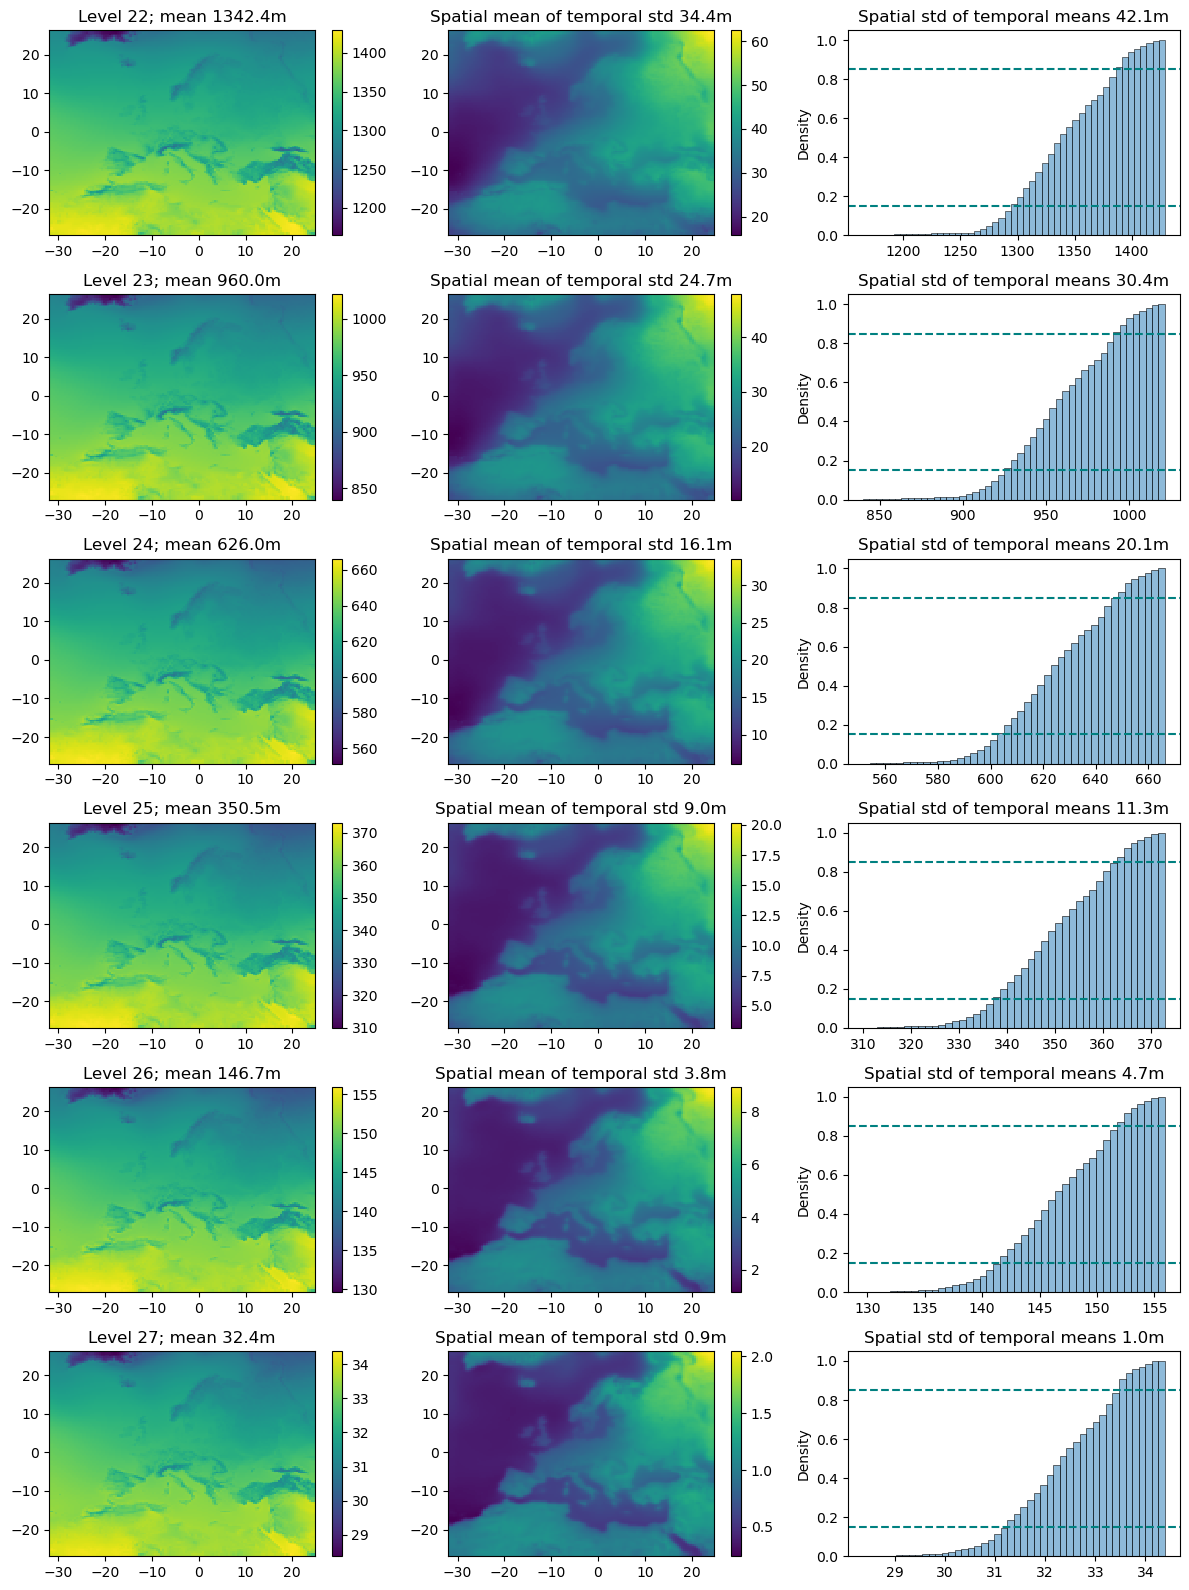

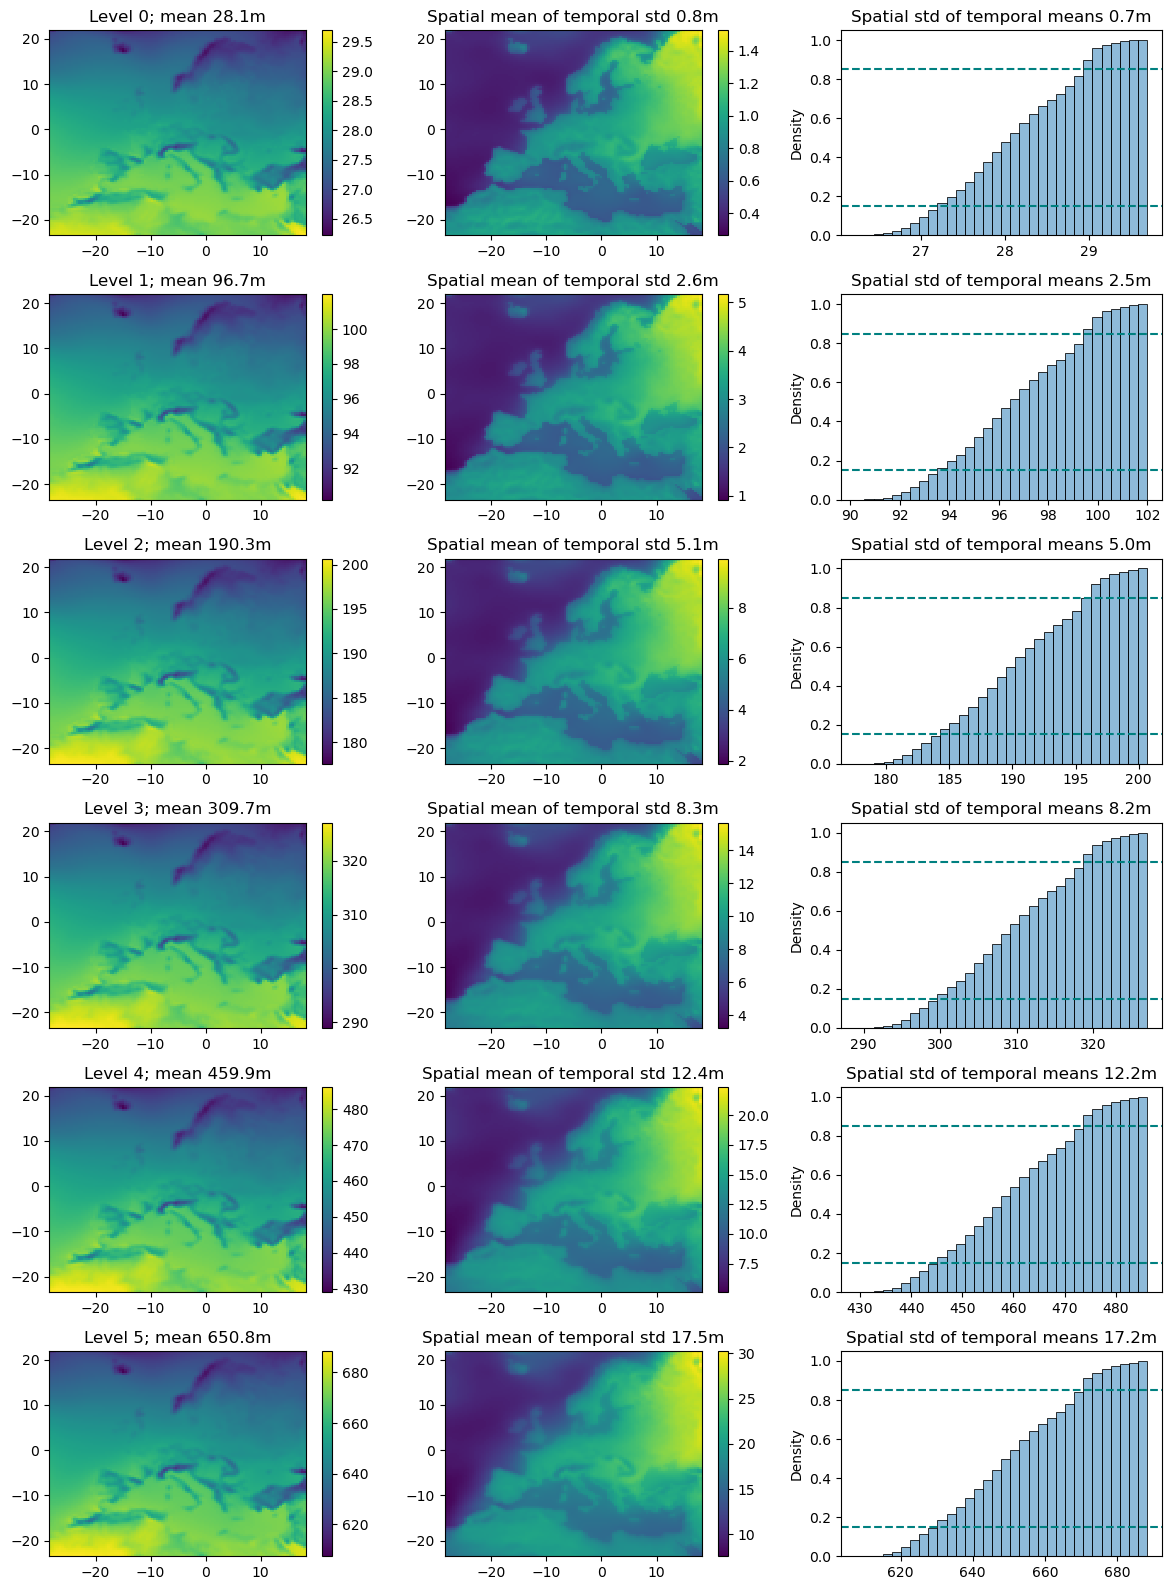

In [7]:
# Compute dictionary of approximate heights per model level
# and add uncertainty estimates
# and visualize distributions

import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plot_path = "../plots/vertical_coordinate/"


# GERICS
ds_GERICS_FI = xr.open_dataset("../data/GERICS/GRASS/FI_interpolated/FI_2000.nc")
ds_GERICS_FIB = xr.open_dataset("../data/GERICS/GRASS/FIB/FIB_2000.nc")
ds_GERICS_height = ds_GERICS_FI["FI"] - ds_GERICS_FIB["FIB"]


plot_mean_std_heights(ds_GERICS_height, "lev", range(22, 28), "GERICS")
# todo output mean level and standard deviations to a dictionary or so

# IDL
ds_IDL_zg = xr.open_dataset(
    "../data/IDL/EVAL/zg/zg_EUR-44_ECMWF-ERAINT_LUCAS_EVAL_r1i1p1_IDL_WRFV381D_v1_1hr_2000010100-2000123123.nc"
)
ds_IDL_oro = xr.open_dataset(
    "../data/IDL/orog_EUR-44_ECMWF-ERAINT_LUCAS_EVAL_r1i1p1_IDL_WRFV381D_v1_fx.nc"
)
# coordinates are off by a rounding error. Corrected here
for ds_tmp in [ds_IDL_zg, ds_IDL_oro]:
    for rdim in ["rlat", "rlon"]:
        ds_tmp[rdim] = np.round(ds_tmp[rdim], 2)
ds_IDL_height = ds_IDL_zg["zg"] - ds_IDL_oro["orog"].drop(["lon", "lat"]) 
plot_mean_std_heights(ds_IDL_height, "mlev", range(6), "IDL")

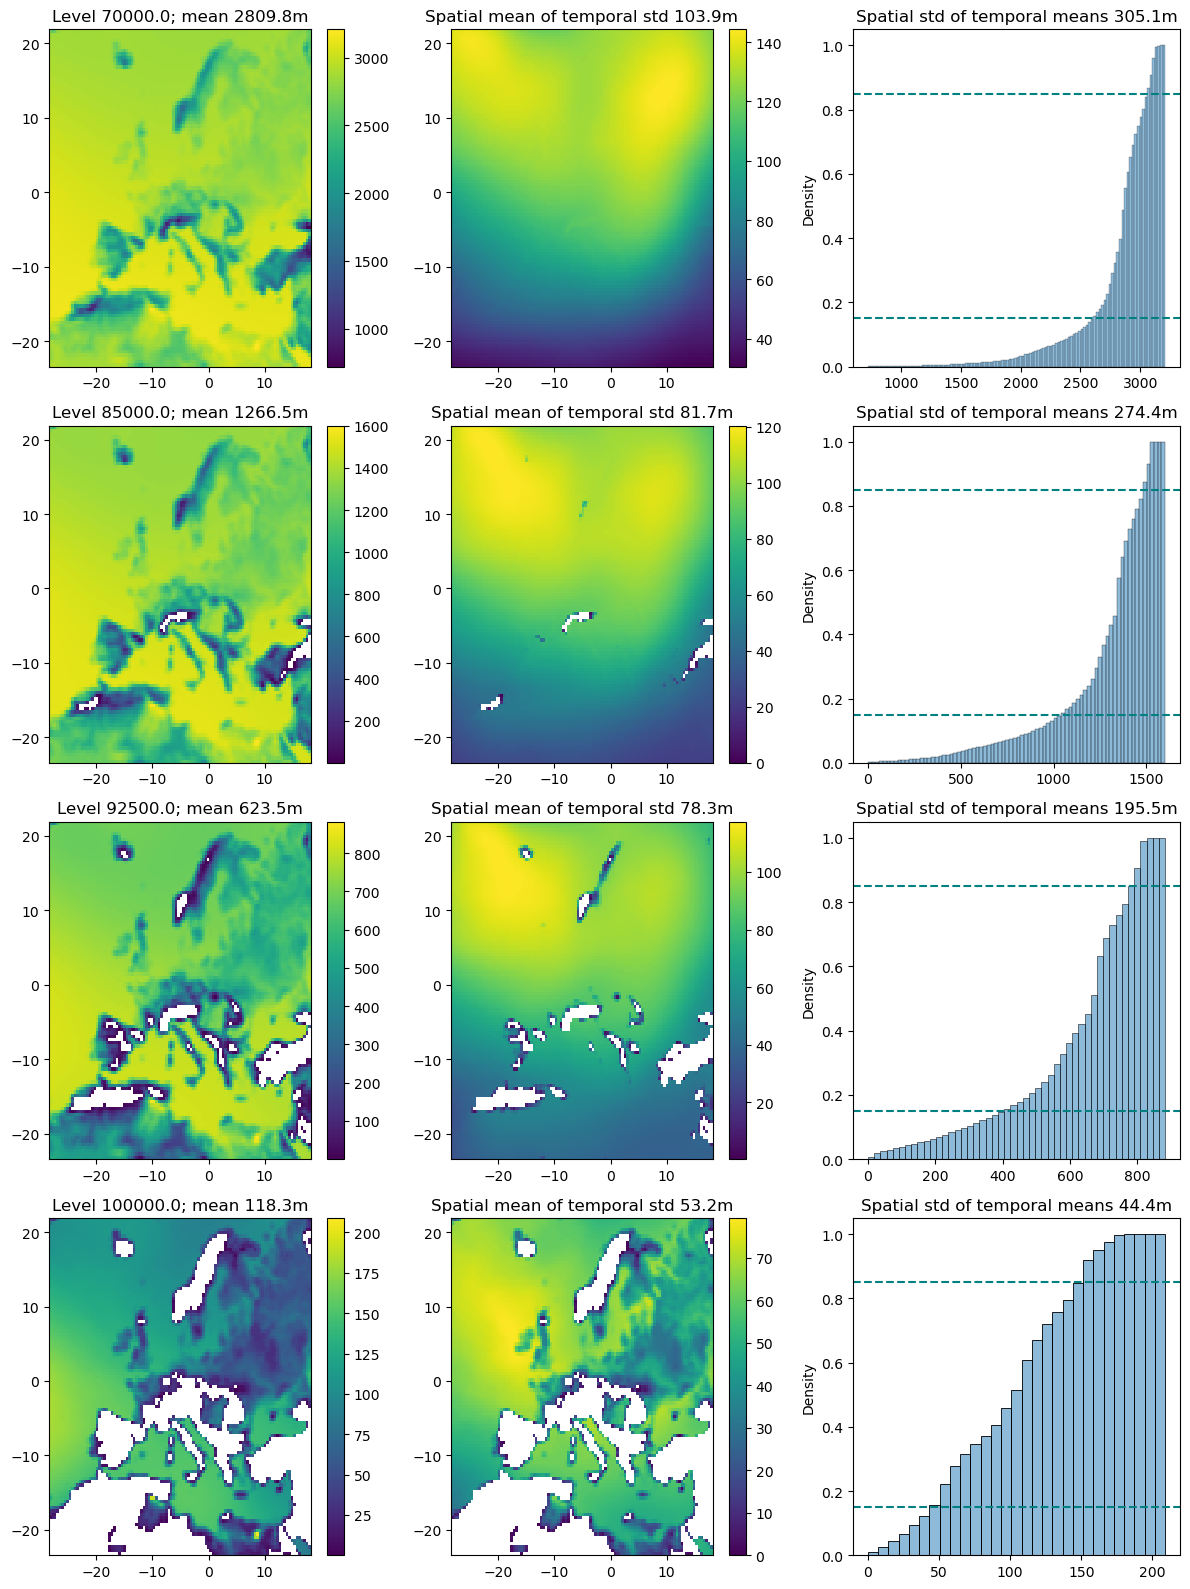

In [13]:
#BCCR
ds_zg = xr.open_dataset("../data/BCCR/GRASS/ZG/ZG_2000.nc").drop("rotated_pole")
ds_oro = xr.open_dataset("../data/IDL/orog_EUR-44_ECMWF-ERAINT_LUCAS_EVAL_r1i1p1_IDL_WRFV381D_v1_fx.nc").drop("rotated_pole")
# I.e., assuming all use the same orography
for ds_tmp in [ds_zg, ds_oro]:
    for rdim in ["rlat", "rlon"]:
        ds_tmp[rdim] = np.round(ds_tmp[rdim], 2)
ds_height = ds_zg["zg"] - ds_oro["orog"]
plot_mean_std_heights(ds_height.drop(["lat", "lon"]), "plev", np.array([ 70000.,  85000.,  92500., 100000.]), "BCCR", nrows=4)

In [16]:
ds_height

<xarray.DataArray (time: 1464, pressure: 2, rlat: 4, rlon: 4)>
array([[[[14463.942 , 14777.754 , 15198.523 , 14866.147 ],
         [15660.808 , 15353.319 , 14945.79  , 14693.431 ],
         [15103.441 , 14809.249 , 13716.083 , 13473.982 ],
         [12245.314 , 12263.424 , 12208.481 , 13000.127 ]],

        [[ 7704.4326,  7995.625 ,  8447.19  ,  8030.6045],
         [ 8793.652 ,  8579.019 ,  8314.995 ,  8178.377 ],
         [ 8321.586 ,  8105.977 ,  7137.6206,  6966.6147],
         [ 5810.189 ,  5691.2583,  5825.8125,  6573.0664]]],


       [[[14612.568 , 14872.215 , 15176.465 , 14798.299 ],
         [15718.343 , 15377.931 , 14941.212 , 14767.916 ],
         [15067.804 , 15004.8125, 13532.929 , 13426.66  ],
         [12358.102 , 11825.617 , 12143.9   , 13113.446 ]],

        [[ 7835.588 ,  8097.8477,  8440.458 ,  7940.4854],
         [ 8840.496 ,  8572.795 ,  8292.441 ,  8219.024 ],
         [ 8352.4795,  8259.173 ,  6858.263 ,  6927.295 ],
         [ 5921.0884,  5247.321 ,  5739.4834,  6694.6475]]],
...
         [14282.33  , 14203.287 , 13886.914 , 13741.917 ],
         [10804.988 , 11681.214 , 13417.183 , 12929.981 ],
         [11869.486 , 11472.923 , 11536.395 , 12450.745 ]],

        [[ 7761.53  ,  7971.4404,  7587.0747,  7601.2397],
         [ 7412.7437,  7461.1895,  7277.2856,  6922.5146],
         [ 4011.9834,  4876.1606,  6884.013 ,  6183.6704],
         [ 5388.2563,  5031.0347,  5116.873 ,  5812.1553]]],


       [[[14888.976 , 14851.968 , 14585.884 , 14364.688 ],
         [14159.148 , 14181.013 , 14137.796 , 13748.548 ],
         [10309.354 , 11472.524 , 13528.78  , 12964.254 ],
         [12239.835 , 10961.729 , 11619.75  , 12472.749 ]],

        [[ 7881.452 ,  8074.745 ,  7856.155 ,  7480.1875],
         [ 7238.9463,  7340.761 ,  7544.2666,  6951.1226],
         [ 3510.0352,  4698.169 ,  7000.688 ,  6235.3027],
         [ 5763.6377,  4509.812 ,  5169.6953,  5814.7754]]]],
      dtype=float32)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01T06:00:00 ... 2001-01-01
  * rlon      (rlon) float64 -24.25 -13.25 -2.25 8.75
  * rlat      (rlat) float64 -19.25 -8.25 2.75 13.75
  * pressure  (pressure) float32 8.5e+04 9.25e+04

In [21]:
ds_oro

<xarray.Dataset>
Dimensions:  (rlat: 103, rlon: 106)
Coordinates:
    lat      (rlat, rlon) float64 ...
    lon      (rlat, rlon) float64 ...
  * rlat     (rlat) float64 -23.21 -22.77 -22.33 -21.89 ... 20.79 21.23 21.67
  * rlon     (rlon) float64 -28.21 -27.77 -27.33 -26.89 ... 17.11 17.55 17.99
Data variables:
    orog     (rlat, rlon) float32 ...
Attributes: (12/26)
    Conventions:                    CF-1.4
    conventionsURL:                 http://www.cfconventions.org
    title:                          CLMcom-ETH-CCLM5-0-6 model output prepare...
    project_id:                     CORDEX
    driving_model_id:               ERAint
    driving_experiment_name:        COSMO_CLM2_EU-CORDEX_EVAL_191019
    ...                             ...
    source:                         Climate Limited-area Modelling Community ...
    references:                     http://cordex.clm-community.eu/
    product:                        output
    frequency:                      fx
    tracking_id:                    dd9922fe-d0c3-11ea-b83c-44a842109655
    creation_date:                  2020-07-28 13:17:04

In [22]:
ds_zg

<xarray.Dataset>
Dimensions:    (time: 1464, bnds: 2, rlat: 129, rlon: 132, pressure: 2)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01T06:00:00 ... 2001-01-01
    lon        (rlat, rlon) float32 ...
    lat        (rlat, rlon) float32 ...
  * rlon       (rlon) float32 -33.93 -33.49 -33.05 -32.61 ... 22.83 23.27 23.71
  * rlat       (rlat) float32 -28.93 -28.49 -28.05 -27.61 ... 26.51 26.95 27.39
  * pressure   (pressure) float32 8.5e+04 9.25e+04
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    FI         (time, pressure, rlat, rlon) float32 ...
Attributes: (12/13)
    CDI:             Climate Data Interface version 1.9.6 (http://mpimet.mpg....
    Conventions:     CF-1.4
    history:         Tue Jan 10 21:35:28 2023: cdo sellevel,92500,85000 -selv...
    source:          COSMO
    institution:     ETH Zurich, Switzerland
    title:           LUCAS phase 1 Eval run on CORDEX-EU-0.44 grid
    ...              ...
    realization:     1
    conventionsURL:  http://www.cfconventions.org/
    contact:         Edouard Davin (edouard.davin@env.ethz.ch)
    references:      http://www.clm-community.eu/
    creation_date:   2019-10-28 15:37:07
    CDO:             Climate Data Operators version 1.9.6 (http://mpimet.mpg....

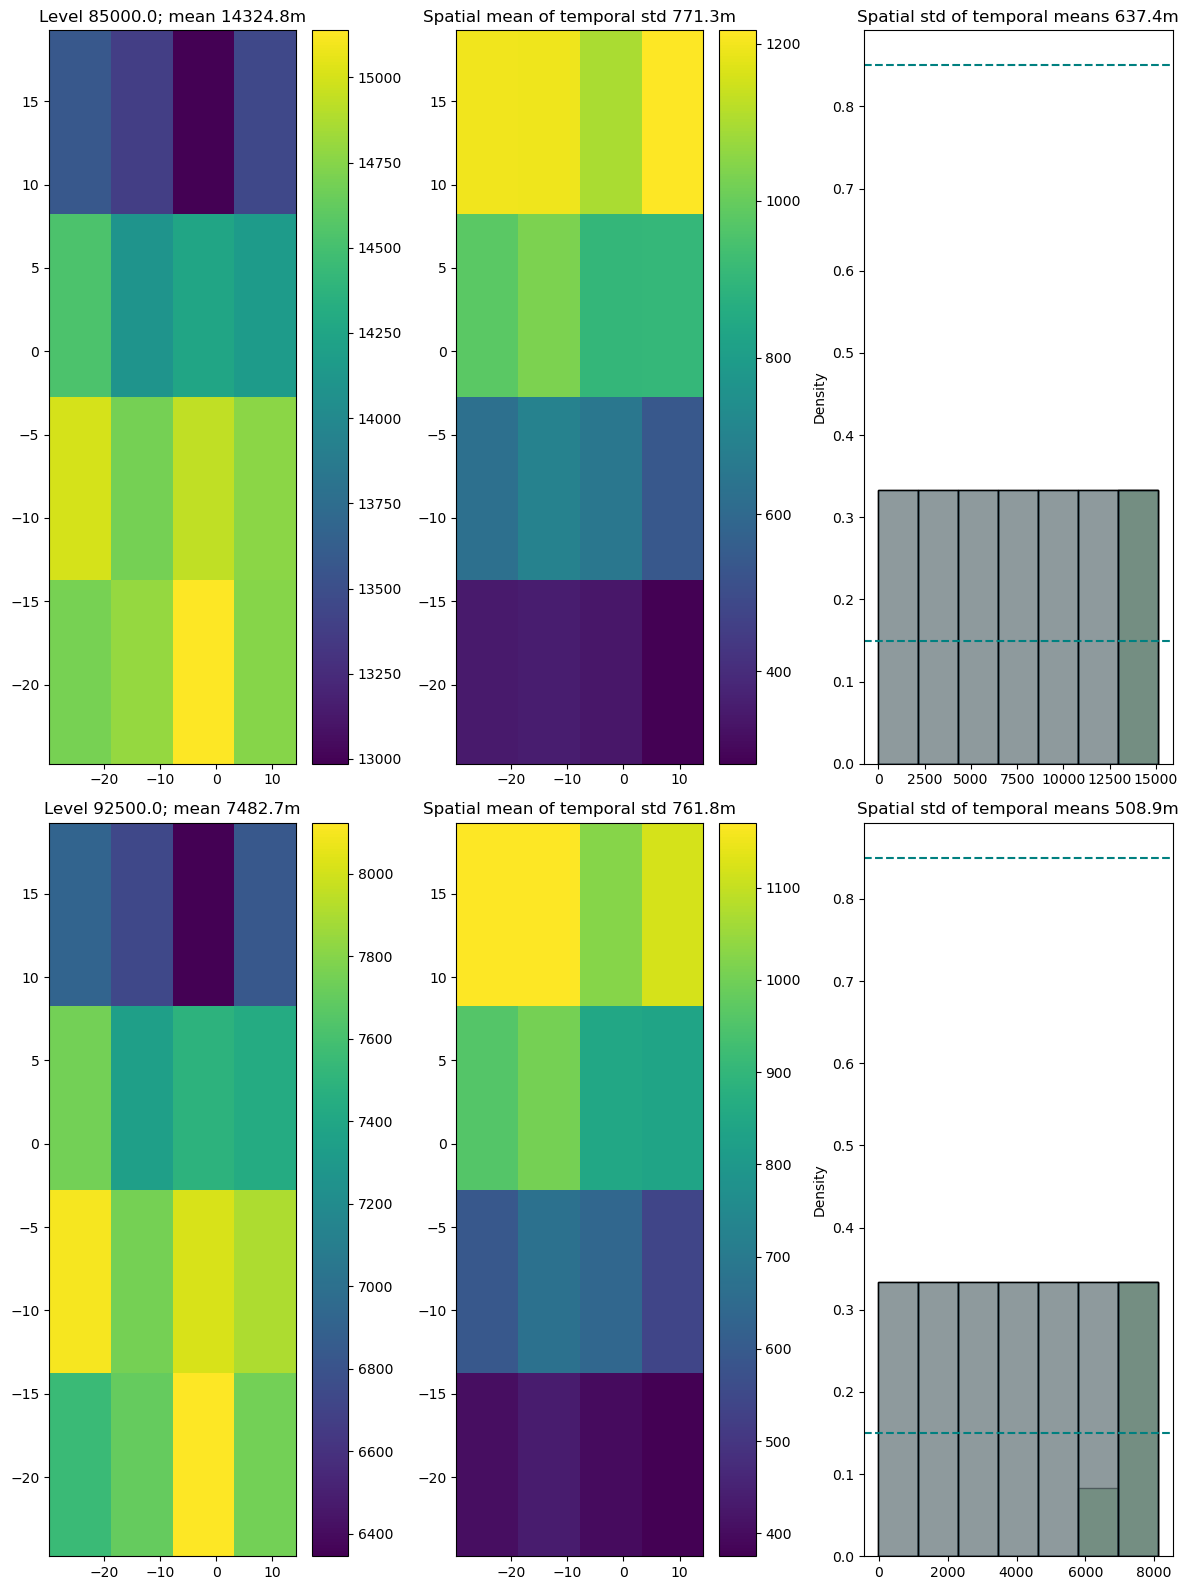

In [20]:
ds_zg = xr.open_dataset("../data/ETH/GRASS/FI/FI_2000.nc").drop("rotated_pole")
ds_oro = xr.open_dataset(
    "../data/ETH/orog_EUR-44_ERAint_COSMO_CLM2_EU-CORDEX_EVAL_191019_r0i0p0_CLMcom-ETH-CCLM-CLM5.0_x0n1v1_fx.nc"
).drop("rotated_pole")
# I.e., assuming all use the same orography
for ds_tmp in [ds_zg, ds_oro]:
    for rdim in ["rlat", "rlon"]:
        ds_tmp[rdim] = np.round(ds_tmp[rdim], 2)
ds_height = ds_zg["FI"] - ds_oro["orog"]
plot_mean_std_heights(
    ds_height,
    "pressure",
    np.array([85000., 92500.]),
    "ETH",
    nrows=2,
)